# Classification Predict TeamJS1 Solutions

© Explore Data Science Academy

#**<font color='blue'>Climate Change Belief Analysis</font>**
---
### Honour Code

We {**TeamJS1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Introduction: Climate Change Belief

<p align="justify" > Earth’s climate is undergoing changes never seen before by humans. Studying climate change will help us understand why global temperatures continue to rise, how the climate affects us, and how we can tackle this challenge before things get much worse. It is imperative to understand climate change for us to plan accordinlgy. Our understanding of the climate can help us predict how much rain will fall next winter as well as how much sea levels will rise as temperatures rise. Finding out what people think about climate change and whether they consider it to be a real threat is important.


### Predict Overview:Climate change

Many companies are built around lessening one’s environmental impact or carbon footprint and they would like to determine how people perceive climate change and whether or not they believe it is a real threat. Our company has been awarded a contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

### Problem statement: 
Our tweeter data allows us to determine whether people in the tweeter data believe climate change is a threat given the ever-changing climate and global changes.

### Our Task: The classification of tweets
To create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Therefore, a robust solution for this task will allow companies to access a wealth of consumer sentiment that spans several demographic and geographical categories - so that their marketing strategies can be better informed. 

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://dnrec.alpha.delaware.gov/wp-content/uploads/sites/2/2020/02/climate-word-map.jpg"
     
Climate Change  Photo by <a href="https://dnrec.alpha.delaware.gov/coastal-programs/planning-training/adapting-to-sea-level-rise/climate-change-perceptions/"> Delaware </a> 
</div>

 ### Key Objectives:
    
1.   To analyse the tweets of Individual Twitter account in term of Sentiments;
2.   Identify individual tweets as news, pro, neutral and anti-climate change; & 
3.   Calculate the f1 score of the sentiments.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In this section we are importing all the relavant packages which will be used for analysis, data cleaning and modeling.

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [1]:
!!pip install nlppreprocess

['Requirement already satisfied: nlppreprocess in c:\\users\\odiaka\\anaconda3\\lib\\site-packages (1.0.2)']

In [2]:
import comet_ml 
from comet_ml import Experiment
# Create an experiment with your api key
experiment = Experiment(
    api_key="p2hFSvlF0e2xt5nFlAsJlzwHu",
    project_name="Team JS1",
    workspace="Explore",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Workspace Explore doesn't exist.


In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Libraries for data preparation and model building
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from PIL import Image

# Import train/test split module

#Modelling Libraries
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#NLP Libraries
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
spacy.cli.download("en_core_web_sm")
from spacy.util import compounding
from spacy.util import minibatch
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

# set plot style
sns.set()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Lets load the data to see what we are dealing with.

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

In [5]:
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [6]:
#Checking the shape of the train and test set
train_df.shape

(15819, 3)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
train_df.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

In [10]:
train_df.skew()

sentiment   -0.683959
tweetid     -0.008471
dtype: float64

The column sentiment is moderately skewed to the negative direction while the column tweetid is fairly symmetrical

In [11]:
train_df.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

From the above figures we can infer there are no outliers in our dataset

In [12]:
X = train_df['message']
y = train_df['sentiment']

Let's do a quick analysis of the distribution of observations across our labels

In [13]:
# Separate minority and majority classes
anti = train_df[y==-1]
neutral = train_df[y==0]
pro = train_df[y==1]
news = train_df[y==2]
y.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

8530 tweets are believe, 3640 tweets are factual news about climate change, 2353 neither support nor refutes, and 1296 tweets do not believe in climate change

In [14]:
#checking for tweet sentiment percetage
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = round((temp['message']/temp['message'].sum())*100,0) 
temp.style.background_gradient(cmap='Purples')

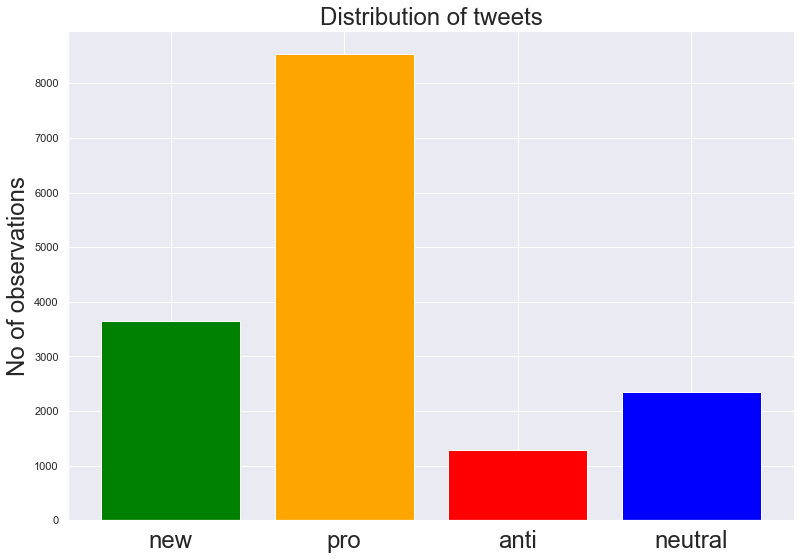

In [15]:
# Get all possible labels
plt.figure(figsize=(13,9))
labels = y.unique()
heights = [len(anti),len(neutral),len(pro),len(news)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green"])
plt.xticks(labels,['anti','neutral','pro','new'])
plt.ylabel("No of Observations")
plt.title("Distribution of tweets", fontsize = 24)
plt.ylabel("No of observations", fontsize = 24)
plt.xticks(labels,['anti', 'neutral', 'pro', 'new'], fontsize = 24)
plt.show()


The bar graph paints a clearer picture of the distribution of tweets and reveals that the train dataset is imbalanced. This imbalance will be dealt with at the later stage of modeling

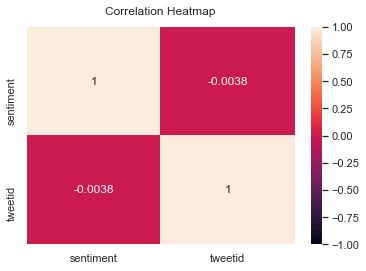

In [16]:
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From our heatmap above there is no indication of high correlation amongst our variables

<AxesSubplot:title={'center':'Density curve'}, xlabel='message', ylabel='Density'>

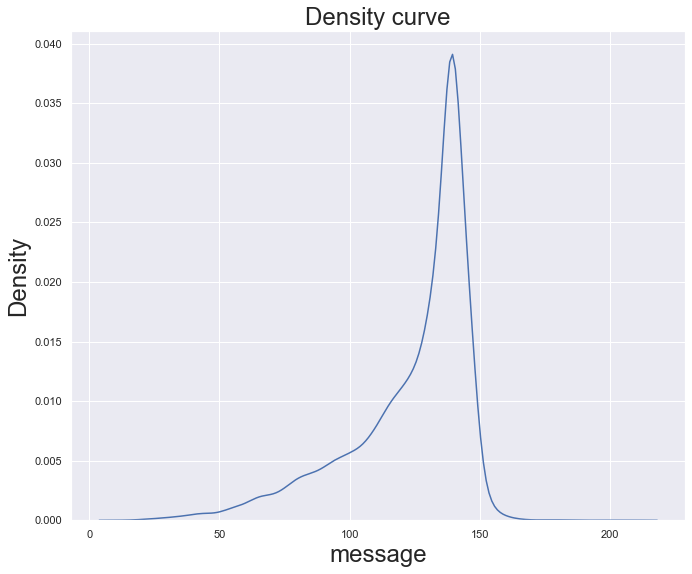

In [17]:
## Lenght of the Text using KDEplot
plt.figure(figsize=(11,9))
lenghth = train_df["message"].str.len()
plt.title("Density curve", fontsize = 24)
plt.xlabel("message", fontsize = 24)
plt.ylabel("Density", fontsize = 24)
sns.kdeplot(lenghth)

The curve is skewed to the left side of the distribution because that’s where the most values are located. It’s also lowest near the ends of the distribution because fewer message take on those values

### Word Cloud Visualization

Visualisations of Words appearing in our tweets

(-0.5, 399.5, 199.5, -0.5)

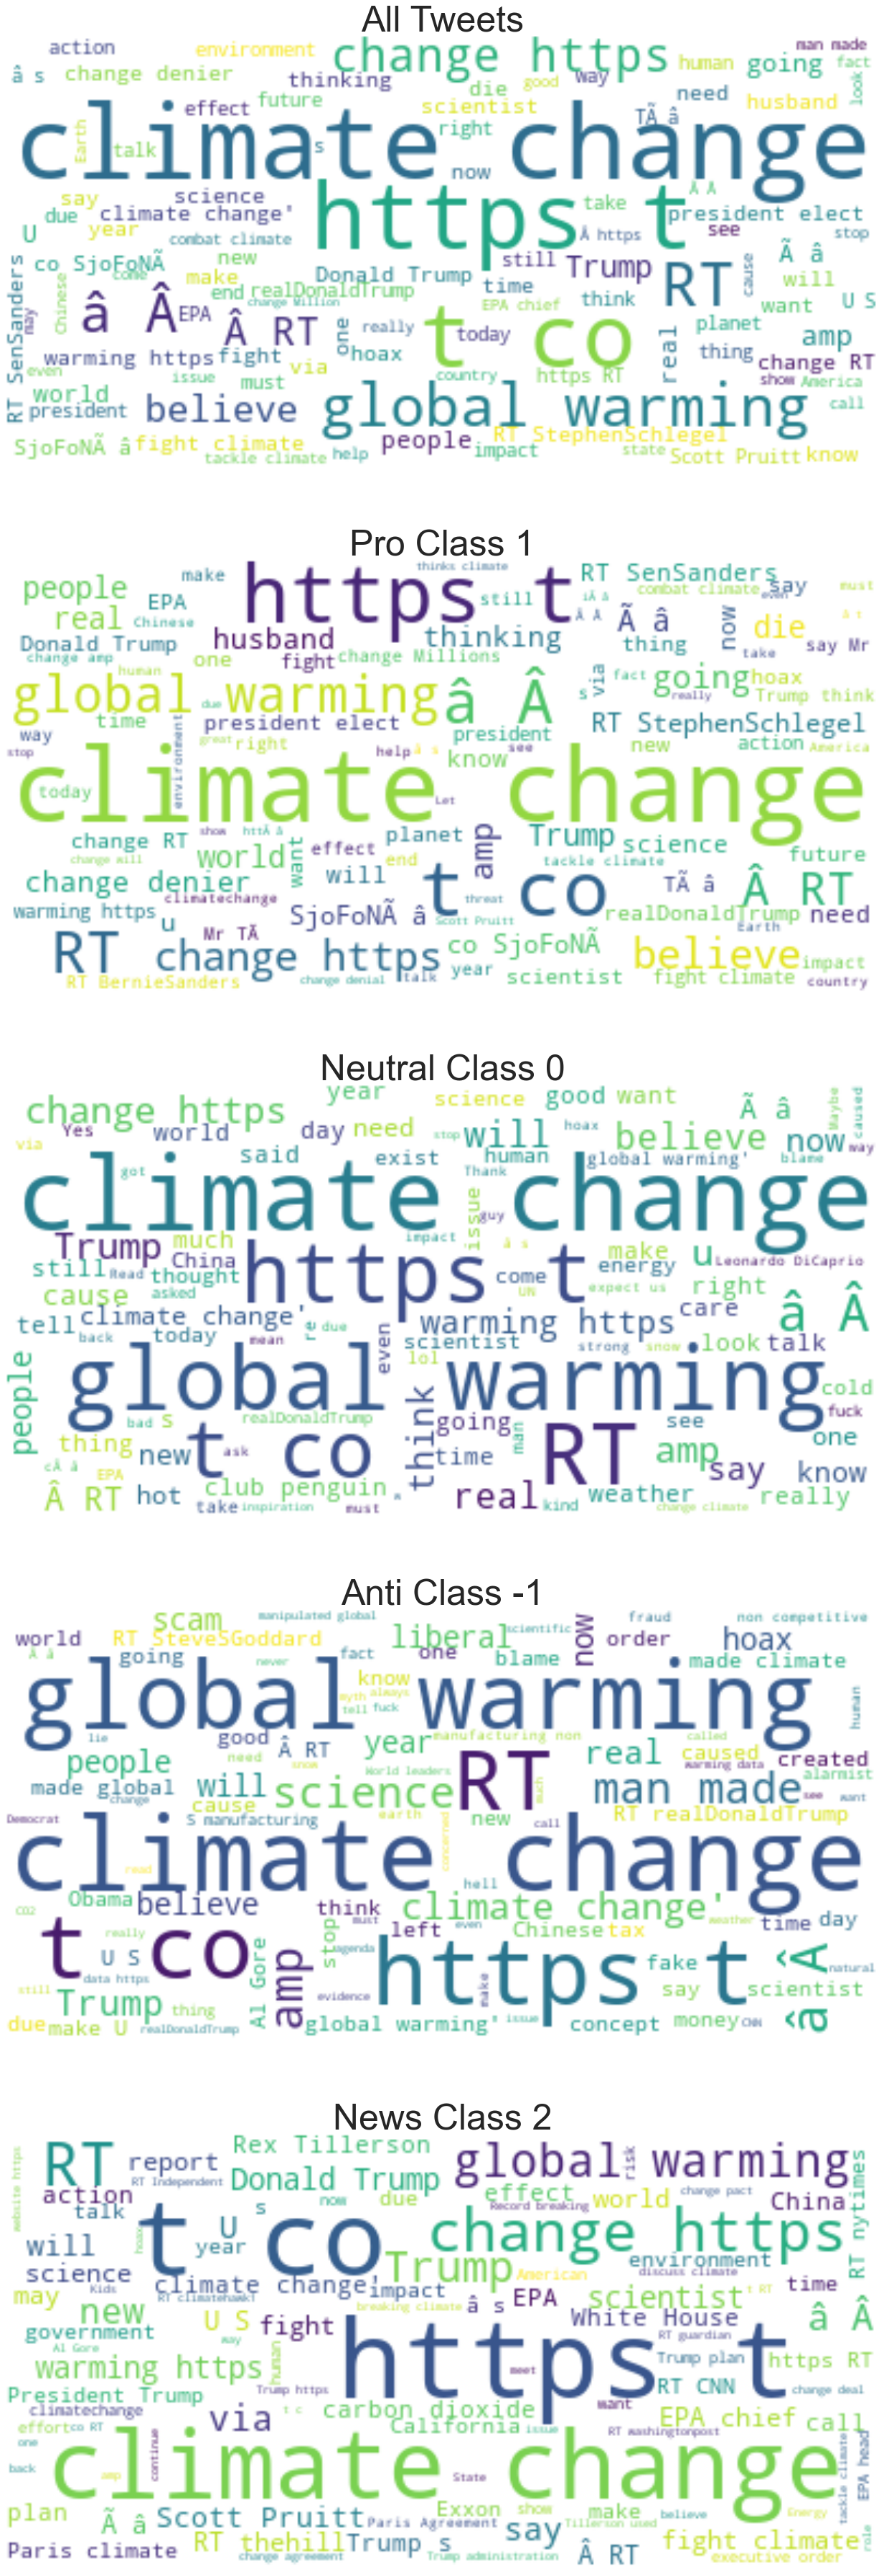

In [18]:
# visualising the messages with word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
senti1 = train_df[train_df['sentiment'] == 1]
senti0 = train_df[train_df['sentiment'] == 0]
senti_neg1 = train_df[train_df['sentiment'] == -1]
senti2 = train_df[train_df['sentiment'] == 2]
tweet_All = " ".join(review for review in train_df.message)
tweet_senti1 = " ".join(review for review in senti1.message)
tweet_senti0 = " ".join(review for review in senti0.message)
tweet_senti_neg1 = " ".join(review for review in senti_neg1.message)
tweet_senti2 = " ".join(review for review in senti2.message)

fig, ax = plt.subplots(5, 1, figsize=(65, 65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet_All)

wordcloud_1 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti1)

wordcloud_0 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti0)

wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100,
                           background_color="white").generate(tweet_senti_neg1)

wordcloud_2 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Pro Class 1', fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neutral Class 0', fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Anti Class -1', fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('News Class 2', fontsize=50)
ax[4].axis('off')


Hashtags

In [19]:
#How many hashtags are there in a tweet?

'''
this function extract hashtags in tweet message
and returns the hashtags
''' 
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from positive/negative tweets

HT_positive = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


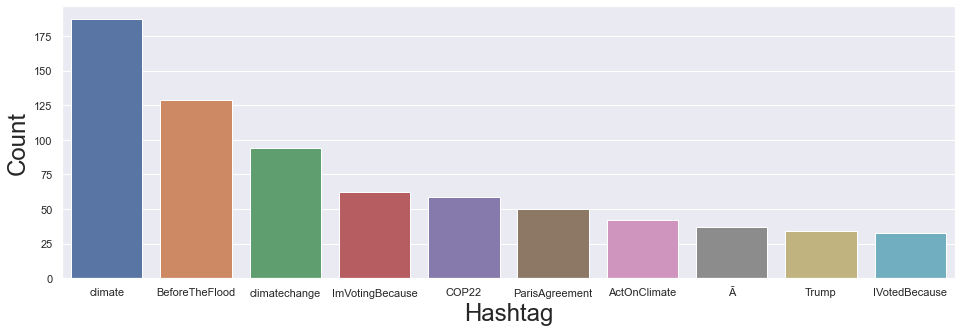

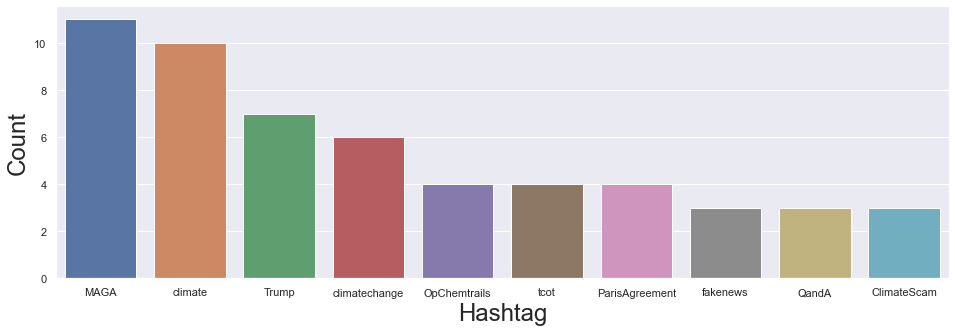

In [20]:
#Positive hastags
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xlabel("Hashtag", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()


#Negative hashtags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xlabel("Hashtag", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# Removing punctuations and unwanted characters present in the messages

def cleaning(text):
    """
    The Function makes text lowercase,removes links,
    punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.

    Parameters:
    argument1(object):It takes the text and converts all it to lowercases
    argument2(object):It takes all the special characters and removes them
    argument3(object):It takes the text and removes all numeric values
    argument4(object):It takes text and expand shortened words

    Returns:
    Object full word without the special characters and numeric values,
    all in lower case

    """
    contractions_dict = {"ain't": "am not / are not / is not / has not /have not",
                         "aren't": "are not / am not", "can't": "cannot",
                         "can't've": "cannot have",
                         "'cause": "because", "could've": "could have",
                         "couldn't": "could not",
                         "couldn't've": "could not have", "didn't": "did not",
                         "doesn't": "does not",
                         "don't": "do not", "hadn't": "had not",
                         "hadn't've": "had not have",
                         "hasn't": "has not", "haven't": "have not",
                         "he'd": "he had / he would",
                         "he'd've": "he would have",
                         "he'll": "he shall / he will",
                         "he'll've": "he shall have / he will have",
                         "he's": "he has / he is",
                         "how'd": "how did", "how'd'y": "how do you",
                         "how'll": "how will",
                         "how's": "how has / how is / how does",
                         "I'd": "I had / I would",
                         "I'd've": "I would have", "I'll": "I shall / I will",
                         "I'll've": "I shall have / I will have",
                         "I'm": "I am", "I've": "I have",
                         "isn't": "is not", "it'd": "it had / it would",
                         "it'd've": "it would have",
                         "it'll": "it shall / it will",
                         "it'll've": "it shall have / it will have",
                         "it's": "it has / it is", "let's": "let us",
                         "ma'am": "madam", "mayn't": "may not",
                         "might've": "might have", "mightn't": "might not",
                         "mightn't've": "might not have",
                         "must've": "must have", "mustn't": "must not",
                         "mustn't've": "must not have",
                         "needn't": "need not",
                         "needn't've": "need not have",
                         "o'clock": "of the clock",
                         "oughtn't": "ought not",
                         "oughtn't've": "ought not have",
                         "shan't": "shall not",
                         "sha'n't": "shall not",
                         "shan't've": "shall not have",
                         "she'd": "she had / she would",
                         "she'd've": "she would have",
                         "she'll": "she shall / she will",
                         "she'll've": "she shall have / she will have",
                         "she's": "she has / she is",
                         "should've": "should have",
                         "shouldn't": "should not",
                         "shouldn't've": "should not have",
                         "so've": "so have",
                         "so's": "so as / so is",
                         "that'd": "that would / that had",
                         "that'd've": "that would have",
                         "that's": "that has / that is",
                         "there'd": "there had / there would",
                         "there'd've": "there would have",
                         "there's": "there has / there is",
                         "they'd": "they had / they would",
                         "they'd've": "they would have",
                         "they'll": "they shall / they will",
                         "they'll've": "they shall have / they will have",
                         "they're": "they are",
                         "they've": "they have", "to've": "to have",
                         "wasn't": "was not",
                         "we'd": "we had / we would",
                         "we'd've": "we would have",
                         "we'll": "we will", "we'll've": "we will have",
                         "we're": "we are", "we've": "we have",
                         "weren't": "were not",
                         "what'll": "what shall / what will",
                         "what'll've": "what shall have / what will have",
                         "what're": "what are", "what's": "what has / what is",
                         "what've": "what have",
                         "when's": "when has / when is",
                         "when've": "when have",
                         "where'd": "where did",
                         "where's": "where has / where is",
                         "where've": "where have",
                         "who'll": "who shall / who will",
                         "who'll've": "who shall have / who will have",
                         "who's": "who has / who is", "who've": "who have",
                         "why's": "why has / why is", "why've": "why have",
                         "will've": "will have",
                         "won't": "will not", "won't've": "will not have",
                         "would've": "would have",
                         "wouldn't": "would not",
                         "wouldn't've": "would not have",
                         "y'all": "you all", "y'all'd": "you all would",
                         "y'all'd've": "you all would have",
                         "y'all're": "you all are",
                         "y'all've": "you all have",
                         "you'd": "you had / you would",
                         "you'd've": "you would have",
                         "you'll": "you shall / you will",
                         "you'll've": "you shall have / you will have",
                         "you're": "you are",
                         "you've": "you have"}
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
# Make text lowercase        
    text = str(text).lower() 
# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_message']=train_df['message'].apply(lambda x: cleaning(x))
test_df['clean_message']=test_df['message'].apply(lambda x: cleaning(x))


In [23]:
# Comparison of Tweets before we apply the function cleaner and after
#tweet = train_df.iloc[7,1]
#tweet_clean = cleaning(tweet)
#print('BEFORE\n', tweet)
#print('AFTER\n', tweet_clean)

In [24]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief does not think carbon d...  
1  it has it is not like we lack evidence of anth...  
2  rt researchers say we have three years to act ...  
3  wired  was a pivotal year in the war on climat...  
4  rt it has it is  and a racist sexist climate c...

In [25]:
train_df.shape

(15819, 4)

### Natural Language Tool Kit(NLKT)

Lemmatization

In [26]:
nlp = spacy.load("en_core_web_sm")

def lemmatizer(text):
    """The function takes a text and extracts the lemma word
    Parameters:
    argument(object):The function creates an empty list
    to insert all the lemma of the text
    Returns:
    lemma of the clean message
    """
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

train_df["lemmaa"] = train_df.apply(lambda x: lemmatizer(
                                   x['clean_message']), axis=1)
test_df["lemmaa"] = test_df.apply(lambda x: lemmatizer(
                                 x['clean_message']), axis=1)

In [27]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  
0  polyscimajor epa chief do not think carbon dio...  
1  it have it be not like we lack evidence of ant...  
2  rt researcher say we have three year to act on...  
3  wire   be a pivotal year in the war on climate...  
4  rt it have it be   and a racist sexist climate...

Removing "rt"


This is removed because it does not add any significance to the text.

In [28]:
# removing rt
def remove(text):
    """
    removes rt from the lemmatized words,
    returns clean lemma words without rt
    """
    text = re.sub(r'rt', '', text)
    return text

train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))

In [29]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  
0  polyscimajor epa chief do not think carbon dio...  
1  it have it be not like we lack evidence of ant...  
2   researcher say we have three year to act on c...  
3  wire   be a pivotal year in the war on climate...  
4   it have it be   and a racist sexist climate c...

Removing words shorter than 3
Upon reasearch, we discovered that words that are not longer than length of 3, usually do not have much significance. Some of these words include slang and expression words such as "hmm", "oh"

In [30]:
train_df['clean_lemma'] = train_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test_df['clean_lemma'] = test_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [31]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  
0  polyscimajor chief think carbon dioxide main c...  
1  have like lack evidence anthropogenic global w...  
2  researcher have three year climate change befo...  
3                   wire pivotal year climate change  
4  have racist sexist climate change deny bigot l...

Tokenization

In [32]:
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [33]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  
0  [polyscimajor, chief, think, carbon, dioxide, ...  
1  [have, like, lack, evidence, anthropogenic, gl...  
2  [researcher, have, three, year, climate, chang...  
3             [wire, pivotal, year, climate, change]  
4  [have, racist, sexist, climate, change, deny, ...

Stop words

In [34]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

## Checking for stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'over', 'was', 'can', 'some', 'then', 'further', 'and', 'mightn', "hasn't", 'll', 'own', 'isn', 've', 'off', "she's", 'because', 'couldn', 'does', 'or', "wasn't", 'above', 'about', "hadn't", "it's", 'until', 'had', 'who', 'just', 'all', 's', 'i', "weren't", 'have', 'on', 'other', 'how', 'what', 'he', "mightn't", 'his', 'ourselves', 'where', 'very', 're', 'didn', 'of', 'from', 'more', 'the', 'any', 'me', 'having', 'yours', "mustn't", 'ain', "you'll", 'needn', 'don', 'did', 'below', 'doing', 'do', 'too', 'in', "didn't", 'as', 'y', 'while', 'only', 'such', 'no', 'same', 'itself', "wouldn't", 'into', 'not', 'so', "don't", 'won', 'she', 'against', 'once', 'doesn', 'it', 'which', 'these', 'her', "that'll", 'nor', 'mustn', 'out', 'with', "won't", 'herself', 'those', 'hadn', 'between', 'than', 'they', 'am', 'here', 'each', 'by', 'now', 'be', 'wouldn', 'were', 'we', 'under', 'hers', "shan't", "aren't", 'an', 'haven', 'is', 'our', 'ma', 'themselves', "you'd", "doesn't", 'at', 'up', 'both', 'to'

Removing stop words

In [35]:
# removing stop words
train_df['clean_stp_words'] = train_df[
                                       'tokenized_message'].apply(
                                        lambda x: [item for item in x
                                                   if item not in stop_words])

test_df['clean_stp_words'] = test_df[
                                    'tokenized_message'].apply(
                                    lambda x: [item for item in x
                                               if item not in stop_words])

In [36]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   
3             [wire, pivotal, year, climate, change]   
4  [have, racist, sexist, climate, change, deny, ...   

                                     clean_stp_words  
0  [polyscimajor, chief, think, carbon, dioxide, ...  
1  [like, lack, evidence, anthropogenic, global, ...  
2   [researcher, three, year, climate, change, late]  
3             [wire, pivotal, year, climate, change]  
4  [racist, sexist, climate, change, deny, bigot,...

Detokenization//delisting

In [37]:
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['clean_stp_words'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['clean_stp_words'].apply(lambda x:
                                                          detokenization(x))

In [38]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   
3  wire   be a pivotal year in the war on climate...   
4  rt it have it be   and a racist sexist climate...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   
3                   wire pivotal year climate change   
4  have racist sexist climate change deny bigot l...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   
3             [wire, pivotal, year, climate, change]   
4  [have, racist, sexist, climate, change, deny, ...   

                                     clean_stp_words  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [like, lack, evidence, anthropogenic, global, ...   
2   [researcher, three, year, climate, change, late]   
3             [wire, pivotal, year, climate, change]   
4  [racist, sexist, climate, change, deny, bigot,...   

                                 detokenized_message  
0  polyscimajor chief think carbon dioxide main c...  
1    like lack evidence anthropogenic global warming  
2          researcher three year climate change late  
3                   wire pivotal year climate change  
4  racist sexist climate change deny bigot lead poll

Difference in raw message and clean message

In [39]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['message'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_message'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_message'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [40]:
train_df.head(3)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  it have it be not like we lack evidence of ant...   
2  rt researcher say we have three year to act on...   

                                         clean_lemma  \
0  polyscimajor chief think carbon dioxide main c...   
1  have like lack evidence anthropogenic global w...   
2  researcher have three year climate change befo...   

                                   tokenized_message  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [have, like, lack, evidence, anthropogenic, gl...   
2  [researcher, have, three, year, climate, chang...   

                                     clean_stp_words  \
0  [polyscimajor, chief, think, carbon, dioxide, ...   
1  [like, lack, evidence, anthropogenic, global, ...   
2   [researcher, three, year, climate, change, late]   

                                 detokenized_message  Num_words_raw  \
0  polyscimajor chief think carbon dioxide main c...             19   
1    like lack evidence anthropogenic global warming             10   
2          researcher three year climate change late             19   

   Num_words_clean  difference_in_wordsNo  
0               18                      1  
1               13                      3  
2               17                      2

In [41]:
#### Word Cloud Visualization on Clean Data

(-0.5, 399.5, 199.5, -0.5)

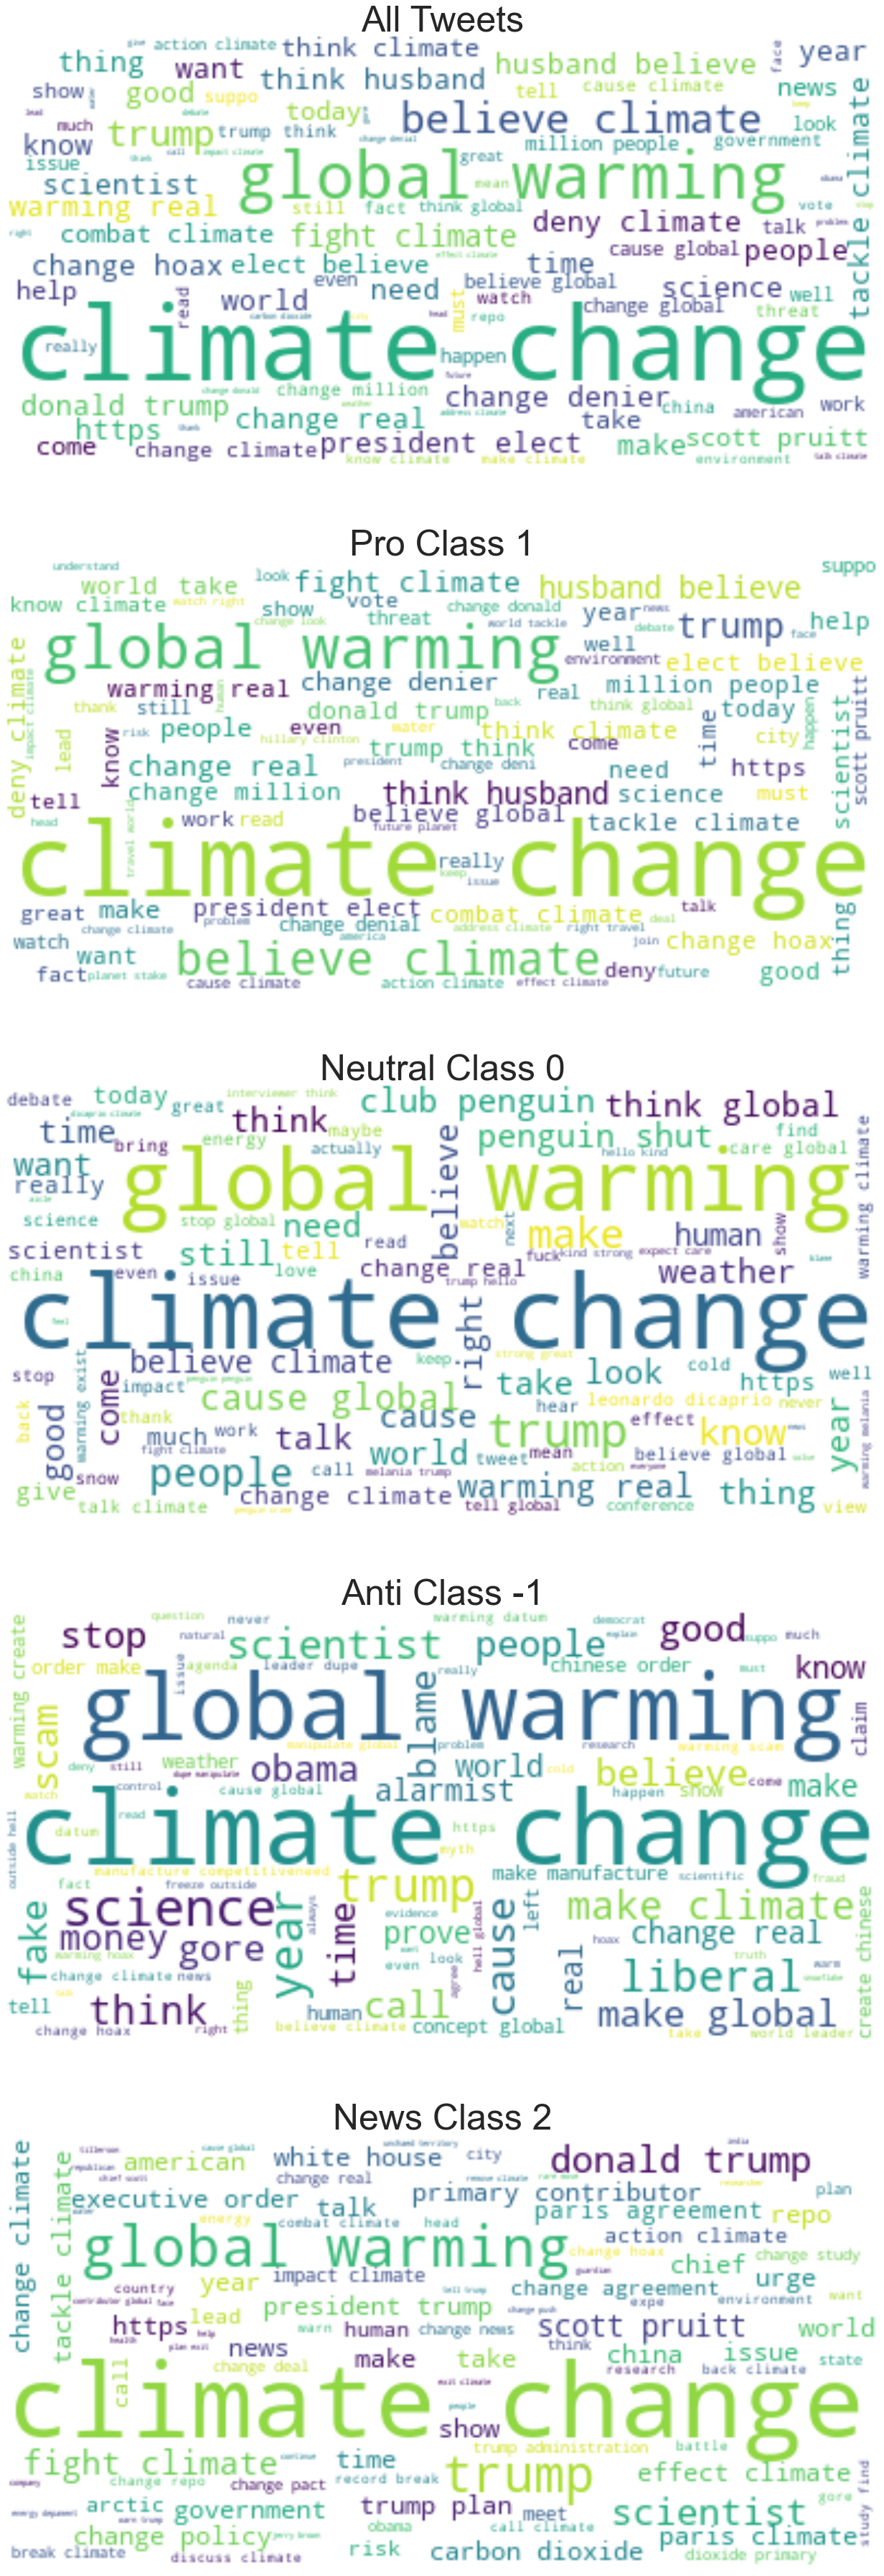

In [42]:
# visualising the messages with word cloud
df_senti1 = train_df[train_df['sentiment'] == 1]
df_senti0 = train_df[train_df['sentiment'] == 0]
df_senti_neg1 = train_df[train_df['sentiment'] == -1]
df_senti2 = train_df[train_df['sentiment'] == 2]
tweet_All = " ".join(review for review in train_df.detokenized_message)
tweet_senti1 = " ".join(review for review in df_senti1.detokenized_message)
tweet_senti0 = " ".join(review for review in df_senti0.detokenized_message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.detokenized_message)
tweet_senti2 = " ".join(review for review in df_senti2.detokenized_message)

fig, ax = plt.subplots(5, 1, figsize=(65, 65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet_All)

wordcloud_1 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti1)

wordcloud_0 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti0)

wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100,
                           background_color="white").generate(tweet_senti_neg1)

wordcloud_2 = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Pro Class 1', fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neutral Class 0', fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Anti Class -1', fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('News Class 2', fontsize=50)
ax[4].axis('off')

After cleaning our text data another WordCloud visual was created for further analysis. Given that Donald `Trump` was president of USA, it is not surprising that his name is still the most common on all sentiments. The momentum for these sentiments comes from the commentary that president Trump has made about climate change. Given the position he held, it is possible that the sentiments reflected are related to Trump's commentary on climate change during his term of office. 

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


##### Classification Metrics
For the purpose of this project, `four` classification metrics were used to assess model performance: `Accuracy, Precision, Recall, and F1-score.`

1. Accuracy 

This is the proportion of results among the total number of cases examined.

2.  Precision 

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

3. Recall

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made

4. F1-score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

### Modeling on Raw Data

In [43]:
#Splitting you Data for X and Y
X = train_df['message']
y = train_df['sentiment']

VECTORIZATION
Before we can feed our data into our machine learning model, we need to first transform the text into numbers. One common method well suited for this task is Count Vectorization. 

In [44]:
#vector = TfidfVectorizer(sublinear_tf=True)
vec = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vec.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rando = RandomForestClassifier()

rando.fit(X_train,y_train)

rando_pred = rando.predict(X_test)
rando_accuracy = accuracy_score(y_test,rando_pred)

print("Training accuracy Score    : ",rando.score(X_train,y_train))
print("Testing accuracy Score : ",rando_accuracy )

print(classification_report(rando_pred,y_test))

Training accuracy Score    :  0.9989727380482023
Testing accuracy Score :  0.7212389380530974
              precision    recall  f1-score   support

          -1       0.17      0.92      0.29        51
           0       0.33      0.66      0.44       216
           1       0.91      0.71      0.80      2241
           2       0.71      0.77      0.74       656

    accuracy                           0.72      3164
   macro avg       0.53      0.76      0.57      3164
weighted avg       0.81      0.72      0.75      3164



Predictions 

In [47]:
X_test = test_df['message']
X_test =vec.transform(X_test)

In [48]:
# saving to csv for kaggle submission
test_p = rando.predict(X_test)

test_df['sentiment'] = test_p

sub = test_df[['tweetid','sentiment']]
sub.to_csv('rando.csv', index=False) 

In [49]:
sub

tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          1
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

 Modeling On Clean Data

In [50]:
#Splitting you Data for X and Y
X_NB = train_df['detokenized_message']
y = train_df['sentiment']

In [51]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_NB)

In [52]:
import pickle 

model_save_path = "TfidfVectorizer.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(vector, file)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

Logistic regression classification

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8271392081736909
Testing accuracy Score :  0.7672955974842768
              precision    recall  f1-score   support

          -1       0.40      1.00      0.57         4
           0       0.33      0.62      0.43        13
           1       0.95      0.75      0.84       114
           2       0.71      0.86      0.77        28

    accuracy                           0.77       159
   macro avg       0.60      0.81      0.65       159
weighted avg       0.84      0.77      0.79       159



C:\Users\Odiaka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
import pickle

model_save_path = "Random_Forest_Classifier.pkl"

with open(model_save_path, "wb") as file:
    pickle.dump(logreg, file)

Naive Bayes classification

In [56]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.7340996168582375
Testing accuracy Score :  0.7169811320754716
              precision    recall  f1-score   support

          -1       0.20      1.00      0.33         2
           0       0.21      1.00      0.34         5
           1       0.98      0.68      0.80       131
           2       0.53      0.86      0.65        21

    accuracy                           0.72       159
   macro avg       0.48      0.88      0.53       159
weighted avg       0.88      0.72      0.76       159



Random forest classification

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.991315453384419
Testing accuracy Score :  0.6918238993710691
              precision    recall  f1-score   support

          -1       0.20      0.50      0.29         4
           0       0.42      0.59      0.49        17
           1       0.89      0.71      0.79       114
           2       0.50      0.71      0.59        24

    accuracy                           0.69       159
   macro avg       0.50      0.63      0.54       159
weighted avg       0.76      0.69      0.71       159



Linear Support Vector Classifier

In [58]:
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()

lsvc_clf.fit(X_train,y_train)

lsvc_prediction = lsvc_clf.predict(X_test)

lsvc_accuracy = accuracy_score(y_test,lsvc_prediction)

print("Training accuracy Score    : ",lsvc_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_accuracy )

print(classification_report(lsvc_prediction,y_test))

Training accuracy Score    :  0.9523627075351213
Testing accuracy Score :  0.7672955974842768
              precision    recall  f1-score   support

          -1       0.30      0.75      0.43         4
           0       0.50      0.60      0.55        20
           1       0.89      0.79      0.84       102
           2       0.76      0.79      0.78        33

    accuracy                           0.77       159
   macro avg       0.61      0.73      0.65       159
weighted avg       0.80      0.77      0.78       159



In [59]:
import pickle 

model_save_path = "Linear_Support_Vector_Classifier.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(lsvc_clf, file)

XG Boost

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [60]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy, lsvc_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
0  Logistic Regression        0.767296
3            Linear SVC       0.767296
2           Naive Bayes       0.716981
1         Random Forest       0.691824

Predictions

In [61]:
X_N_test = test_df['detokenized_message']
X_test =vector.transform(X_N_test)

In [62]:
test_pred = logreg.predict(X_test)

test_df['sentiment'] = test_pred

subm = test_df[['tweetid','sentiment']]
subm.to_csv('subm.csv', index=False) 

In [63]:
subm

tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          0
10542   875167          1
10543    78329          1
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

Dealing with imbalanced data

#### Checking how raw data is distributed

In [64]:
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = round((temp['message']/temp['message'].sum())*100,0) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='Purples')

The data is distributed unevenly, sentiment 1 taking 54% of the data, with sentiment 2 taking 23%, sentiment 0 taking 15%, and the remaining 8% being sentiment -1. This could lead to the model being biased in its prediction towards sentiment 1.

### DownSampling Data

#### Redefining sentiments for downsampling

In [65]:
# Defining sentiments
Positive = train_df[train_df['sentiment'] == 1]
Negative = train_df[train_df['sentiment'] == -1]
Neutral = train_df[train_df['sentiment'] == 0]
News = train_df[train_df['sentiment'] == 2]

#### Downsampling majority to match minority classes

In [66]:
# Pro sample without replacement, match minority class, reproduce results
Pro_downsampled = resample(Positive, replace=False,
                           n_samples=len(Negative), random_state=27)
# Neutral sample without replacement, match minority class, reproduce results
Neutral_downsampled = resample(Neutral, replace=False,
                               n_samples=len(Negative), random_state=27)
# News sample without replacement, match in minority class, reproduce results
News_downsampled = resample(News, replace=False, 
                            n_samples=len(Negative), random_state=27)
# Combine downsampled majority class with minority class
downsampled = pd.concat([Pro_downsampled, Neutral_downsampled,
                         News_downsampled, Negative])

#### Checking downsampled data distribution

In [67]:
down = downsampled.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
down['percentage'] = round((down['message']/down['message'].sum())*100,0) #checking for tweet sentiment percetage
down.style.background_gradient(cmap='Purples')

The data is evenly distributed now

## Modeling on Downsampled Data

###### Defining X and Y variable

In [68]:
X_d = downsampled['detokenized_message']
y = downsampled['sentiment']

In [69]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

###### Train-Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

###### Logistics Regression 

In [71]:
from sklearn.linear_model import LogisticRegression
log_d = LogisticRegression()

log_d.fit(X_train, y_train)

log_d_prediction = log_d.predict(X_test)
log_d_accuracy = accuracy_score(y_test,log_d_prediction)

print("Training accuracy Score    : ",log_d.score(X_train,y_train))
print("Testing accuracy Score : ",log_d_accuracy )
print(classification_report(log_d_prediction,y_test))

Training accuracy Score    :  0.8647700701480904
Testing accuracy Score :  0.7307692307692307
              precision    recall  f1-score   support

          -1       0.89      0.76      0.82        21
           0       0.71      0.67      0.69        15
           1       0.58      0.78      0.67         9
           2       0.62      0.71      0.67         7

    accuracy                           0.73        52
   macro avg       0.70      0.73      0.71        52
weighted avg       0.75      0.73      0.74        52



C:\Users\Odiaka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#import pickle 

model_save_path = "Logistic_Regression_Classifier.pkl"

with open(model_save_path, 'wb') as file:
    pickle.dump(log_d_prediction, file)

###### Naives Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB

NB_DS = MultinomialNB()

NB_DS.fit(X_train,y_train)

NB_DS_pred = NB_DS.predict(X_test)

NB_DS_accuracy = accuracy_score(y_test,NB_DS_pred)

print("training accuracy Score: ", NB_DS.score(X_train,y_train))
print("Testing accuracy Score : ", NB_DS_accuracy )

print(classification_report(NB_DS_pred,y_test))

training accuracy Score:  0.8250194855806703
Testing accuracy Score :  0.6538461538461539
              precision    recall  f1-score   support

          -1       0.78      0.78      0.78        18
           0       0.57      0.57      0.57        14
           1       0.67      0.62      0.64        13
           2       0.50      0.57      0.53         7

    accuracy                           0.65        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.66      0.65      0.65        52



###### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

RF_DS = RandomForestClassifier()

RF_DS.fit(X_train,y_train)

RF_DS_pred = RF_DS.predict(X_test)
RF_DS_accuracy = accuracy_score(y_test,RF_DS_pred)

print("Training accuracy Score    : ",RF_DS.score(X_train,y_train))
print("Testing accuracy Score : ",RF_DS_accuracy )

print(classification_report(RF_DS_pred,y_test))

Training accuracy Score    :  0.9933749025720966
Testing accuracy Score :  0.5769230769230769
              precision    recall  f1-score   support

          -1       0.61      0.79      0.69        14
           0       0.57      0.62      0.59        13
           1       0.42      0.36      0.38        14
           2       0.75      0.55      0.63        11

    accuracy                           0.58        52
   macro avg       0.59      0.58      0.57        52
weighted avg       0.58      0.58      0.57        52



###### Linear Support Vector Classifier

In [75]:
from sklearn.svm import LinearSVC

lsvc_DS_clf = LinearSVC()

lsvc_DS_clf.fit(X_train,y_train)

lsvc_DS_pred = lsvc_DS_clf.predict(X_test)

lsvc_DS_accuracy = accuracy_score(y_test,lsvc_DS_pred)

print("Training accuracy Score    : ",lsvc_DS_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_DS_accuracy )

print(classification_report(lsvc_DS_pred,y_test))

Training accuracy Score    :  0.9707716289945441
Testing accuracy Score :  0.6923076923076923
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81        19
           0       0.71      0.67      0.69        15
           1       0.75      0.75      0.75        12
           2       0.25      0.33      0.29         6

    accuracy                           0.69        52
   macro avg       0.64      0.63      0.63        52
weighted avg       0.71      0.69      0.70        52



### Downsampled Data Model Performances

In [76]:
# Downsampled Data
models = pd.DataFrame({
    'Model Downsampled': [ 'Logistic Regression ', 
              'Random Forest', 'Naive Bayes', 'Linear SVC'],
    'Test accuracy': [ log_d_accuracy, 
              RF_DS_accuracy, NB_DS_accuracy, lsvc_DS_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model Downsampled  Test accuracy
0  Logistic Regression        0.730769
3            Linear SVC       0.692308
2           Naive Bayes       0.653846
1         Random Forest       0.576923

The downsampling results show an improvement in predicting the minority classes. The models' accuracy decreased, some significantly and some not so significant. These models perform well on the train data but perform really bad on the unseen data, in respect of the F1-score. However, it is worth noting that although the Logistics Regression F1-score did decrease, it did not show significant decrease compared to all the other models. The F1-score of the Logistics model moved from 0.767 to 0.75. Therefore,  one can conclude that the logistics model is the best suited model for this project and future sentiment projects.  

In [77]:
X_NB_test = test_df['detokenized_message']
X_test =vector.transform(X_NB_test)

In [78]:
test_pred = log_d.predict(X_test)

test_df['sentiment'] = test_pred

subm = test_df[['tweetid','sentiment']]
subm.to_csv('sub.csv', index=False) 

##### Logging metrics to Comet

In [79]:
# Saving each metric to add to a dictionary for logging
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

f1 = f1_score(y_test,log_d_prediction, average='weighted')
precision = precision_score(y_test,log_d_prediction, average='weighted')
recall = recall_score(y_test,log_d_prediction, average='weighted')

# Create dictionaries for the data we want to log       
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'Logistics Regression',
         'ngram_range': '(1,2)',
         'vectorizer': 'CountVectorizer',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

###### Predictions on test data

In [80]:
subm

tweetid  sentiment
0       169760          1
1        35326          2
2       224985          0
3       476263          1
4       872928          0
...        ...        ...
10541   895714          0
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          2

[10546 rows x 2 columns]

## Conclusion
Several sentiment classification machine learning models were trained and tested on tweet data. The tweets were cleaned, pre-processed and the data was balanced using resampling.Training models and making Predictions using raw data was also tested against processed data. It was found that all models performed better using tweets in original form. Logistic Regression & SVC were the top performing model choices, with Logistics model producing the best f1-score on Kaggle. After visualing the tweets and exploring peoples view on climate change, the different the Logistics Regression model was able to show that people do believe in climate change and they do view it as a threat to their wellbeing and environment. Businesses have a duty to themselves and their customers to continue investing in technologies and manufacturing techniques that promotes environmentally sustainability. 

## Conclusion